In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    if ts_name is not None:
        ts_id = dataset.timeseries_set.all().filter(name=ts_name).first().id

    return dataset, training_dataset, ts_id

In [4]:
def lisa_pearson_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)
    return result

In [5]:
def lisa_dtw_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function='euclidean')
    return result

In [6]:
def lisa_geo_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score'):
    result = %timeit -o lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)
    return result

In [7]:
def rpca_detection_time_it(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    result = %timeit -o robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)
    return result

In [8]:
def histogram_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    result = %timeit -o histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)
    return result

In [9]:
def cluster_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    result = %timeit -o cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)
    return result

In [10]:
def svm_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    result = %timeit -o svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)
    return result

In [11]:
def isolation_forest_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    result = %timeit -o isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)
    return result

In [2]:
# Temp1 Single - TS LENGTH
dataset_name = 'Idaweb Swiss Temperature TS8'
ts_name = 'REH'
dimensions = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [13]:
# TIME TS LENGTH - Pearson
dataset, _, ts_id = get_dataset(dataset_name, ts_name)
lisa_pearson_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = lisa_pearson_detection_time_it(df, df_class, ts_id)
    lisa_pearson_results.append(np.round(np.average(r.all_runs), 2))

1.27 s ± 38.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.46 s ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.59 s ± 56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.69 s ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.85 s ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.03 s ± 36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.17 s ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.34 s ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.49 s ± 7.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.64 s ± 60.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# TIME TS LENGTH - DTW
dataset, _, ts_id = get_dataset(dataset_name, ts_name)
lisa_dtw_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = lisa_dtw_detection_time_it(df, df_class, ts_id)
    lisa_dtw_results.append(np.round(np.average(r.all_runs), 2))

1.72 s ± 5.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.43 s ± 24.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.04 s ± 70.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.79 s ± 88.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.45 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.13 s ± 78.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.68 s ± 107 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.34 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.1 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.75 s ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
# TIME TS LENGTH - LISA VANILLA
dataset, _, ts_id = get_dataset(dataset_name, ts_name)
lisa_geo_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = lisa_geo_detection_time_it(df, df_class, ts_id)
    lisa_geo_results.append(np.round(np.average(r.all_runs), 2))

1.35 s ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.52 s ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.71 s ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.87 s ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.01 s ± 6.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.23 s ± 4.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.39 s ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.51 s ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.69 s ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.93 s ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# TIME TS LENGTH - RPCA
dataset, training_dataset, _ = get_dataset(dataset_name)
rpca_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = rpca_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    rpca_results.append(np.round(np.average(r.all_runs), 2))

2.41 s ± 89.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.51 s ± 88.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.48 s ± 90.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.45 s ± 60.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.55 s ± 64.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.58 s ± 69.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.64 s ± 52.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.65 s ± 63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 69.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.75 s ± 84.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# TIME TS LENGTH - HISTOGRAM
dataset, training_dataset, _ = get_dataset(dataset_name)
histogram_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = histogram_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    histogram_results.append(np.round(np.average(r.all_runs), 2))

2.32 s ± 44.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.37 s ± 70.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.39 s ± 51.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.43 s ± 29.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.49 s ± 39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.46 s ± 40.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.58 s ± 71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.61 s ± 58.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.68 s ± 68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.59 s ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# TIME TS LENGTH - CLUSTER
dataset, training_dataset, _ = get_dataset(dataset_name)
cluster_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = cluster_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    cluster_results.append(np.round(np.average(r.all_runs), 2))

2.35 s ± 48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.41 s ± 62.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.53 s ± 51.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.46 s ± 58.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.57 s ± 72.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.58 s ± 62.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.63 s ± 63.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.64 s ± 66.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 61.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 59.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
# TIME TS LENGTH - SVM
dataset, training_dataset, _ = get_dataset(dataset_name)
svm_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = svm_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    svm_results.append(np.round(np.average(r.all_runs), 2))

2.25 s ± 56.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.32 s ± 65.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.38 s ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.44 s ± 64.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.47 s ± 64.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.53 s ± 64.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.53 s ± 42.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.61 s ± 67.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.59 s ± 50.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.59 s ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# TIME TS LENGTH - ISOLATION FOREST
dataset, training_dataset, _ = get_dataset(dataset_name)
isolation_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    r = isolation_forest_detection_time_it(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    isolation_results.append(np.round(np.average(r.all_runs), 2))

2.63 s ± 45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 38.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 31.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.74 s ± 57.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.75 s ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.81 s ± 68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.86 s ± 31.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.93 s ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.93 s ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.95 s ± 47.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_geo_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [22]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': [1.27, 1.46, 1.59, 1.69, 1.85, 2.03, 2.17, 2.34, 2.49, 2.64]}, {'title': 'LISA (DTW)', 'scores': [1.72, 2.43, 3.04, 3.79, 4.45, 5.13, 5.68, 6.34, 7.1, 7.75]}, {'title': 'LISA (Vanilla)', 'scores': [1.35, 1.52, 1.71, 1.87, 2.01, 2.23, 2.39, 2.51, 2.69, 2.93]}, {'title': 'RPCA', 'scores': [2.41, 2.51, 2.48, 2.45, 2.55, 2.58, 2.64, 2.65, 2.71, 2.75]}, {'title': 'Histogram', 'scores': [2.32, 2.37, 2.39, 2.43, 2.49, 2.46, 2.58, 2.61, 2.68, 2.59]}, {'title': 'Cluster', 'scores': [2.35, 2.41, 2.53, 2.46, 2.57, 2.58, 2.63, 2.64, 2.73, 2.71]}, {'title': 'SVM', 'scores': [2.25, 2.32, 2.38, 2.44, 2.47, 2.53, 2.53, 2.61, 2.59, 2.59]}, {'title': 'Isolation Forest', 'scores': [2.63, 2.67, 2.73, 2.74, 2.75, 2.81, 2.86, 2.93, 2.93, 2.95]}]


In [3]:
import numpy as np
scores = [{'title': 'LISA (Pearson)', 'scores': [1.27, 1.46, 1.59, 1.69, 1.85, 2.03, 2.17, 2.34, 2.49, 2.64]}, {'title': 'LISA (DTW)', 'scores': [1.72, 2.43, 3.04, 3.79, 4.45, 5.13, 5.68, 6.34, 7.1, 7.75]}, {'title': 'LISA (Vanilla)', 'scores': [1.35, 1.52, 1.71, 1.87, 2.01, 2.23, 2.39, 2.51, 2.69, 2.93]}, {'title': 'RPCA', 'scores': [2.41, 2.51, 2.48, 2.45, 2.55, 2.58, 2.64, 2.65, 2.71, 2.75]}, {'title': 'Histogram', 'scores': [2.32, 2.37, 2.39, 2.43, 2.49, 2.46, 2.58, 2.61, 2.68, 2.59]}, {'title': 'Cluster', 'scores': [2.35, 2.41, 2.53, 2.46, 2.57, 2.58, 2.63, 2.64, 2.73, 2.71]}, {'title': 'SVM', 'scores': [2.25, 2.32, 2.38, 2.44, 2.47, 2.53, 2.53, 2.61, 2.59, 2.59]}, {'title': 'Isolation Forest', 'scores': [2.63, 2.67, 2.73, 2.74, 2.75, 2.81, 2.86, 2.93, 2.93, 2.95]}]


In [4]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Length of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

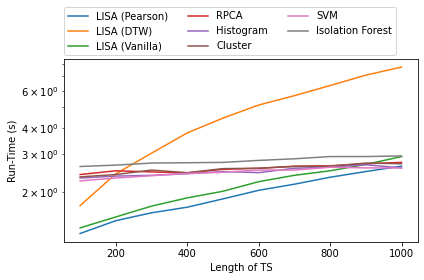

In [5]:
generate_timeit_line_chart(dimensions, scores)

In [3]:
dimension = np.array([200, 400, 600, 800, 1000])

lisa_pearson_results = np.array([1.42, 1.68, 2.01, 2.37, 2.73])
lisa_dtw_results = np.array([2.35, 3.7, 5.08, 6.37, 7.65])
lisa_spatial_results = np.array([1.54, 1.86, 2.21, 2.52, 2.88])

rpca_results = np.array([2.43, 2.5, 2.67, 2.64, 2.75])
histogram_results = np.array([2.35, 2.39, 2.48, 2.56, 2.7])
cluster_results = np.array([2.44, 2.48, 2.48, 2.66, 2.7])
svm_results = np.array([2.25, 2.34, 2.45, 2.48, 2.64])
isolation_results = np.array([2.65, 2.71, 2.79, 2.86, 2.94])

scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [4]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Length of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

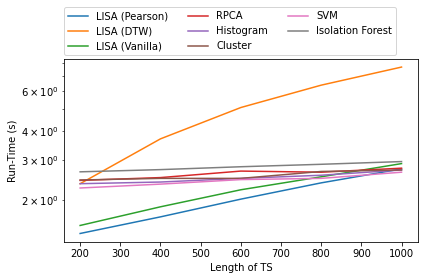

In [5]:
#PLOT
generate_timeit_line_chart(dimension, scores)
